### Chapt 10. 케라스를 사용한 인공 신경망 소개

### 10.1 생물학적 뉴런에서 인공 뉴런까지
#### 10.1.1 생물학적 뉴런 

#### https://brunch.co.kr/@gdhan/6

In [9]:
# Setting
import sys
assert sys.version_info >= (3,5) # python 3.5

# sklearn >=0.20
import sklearn
assert sklearn.__version__ >= "0.20" 

# tensorflow
import tensorflow as tf
assert tf.__version__ >= "2.0"

# common module
import numpy as np
import os

# for consistency
np.random.seed(42)

# clear graph
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# save pics
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout=True, fig_extension ="png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi = resolution)
    

#### 10.1.2 뉴런을 사용한 논리 연산

#### 10.1.3. 퍼셉트론

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
X = iris.data[:, (2,3)] # petal length, width
y = (iris.target == 0).astype(int)
# np.int -> DeprecationWarning -> Use 'int' by itself

per_clf = Perceptron(max_iter =1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

그림 저장:  perceptron_iris_plot


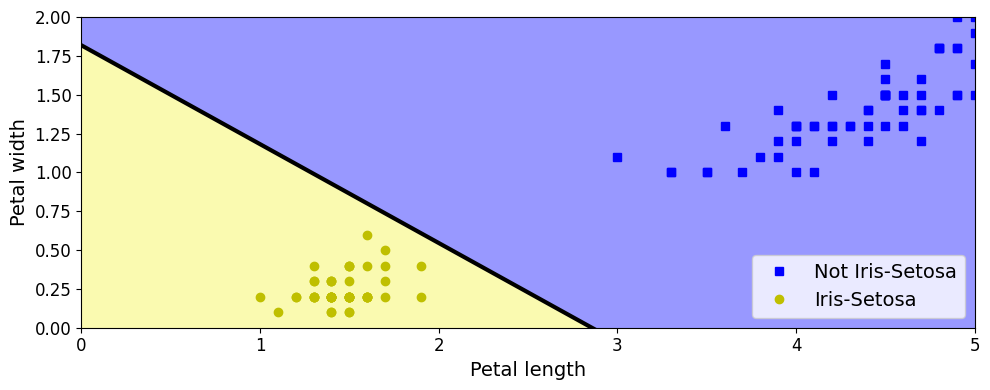

In [8]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label = "Iris-Setosa")

plt.plot([axes[0], axes[1]],[a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc = "lower right", fontsize = 14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

#### 10.1.4. 다층 퍼셉트론과 역전파

In [9]:
# 활성화 함수와 해당 도함수

def sigmoid(z):
    return 1/ (1+np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2*eps)

그림 저장:  activation_functions_plot


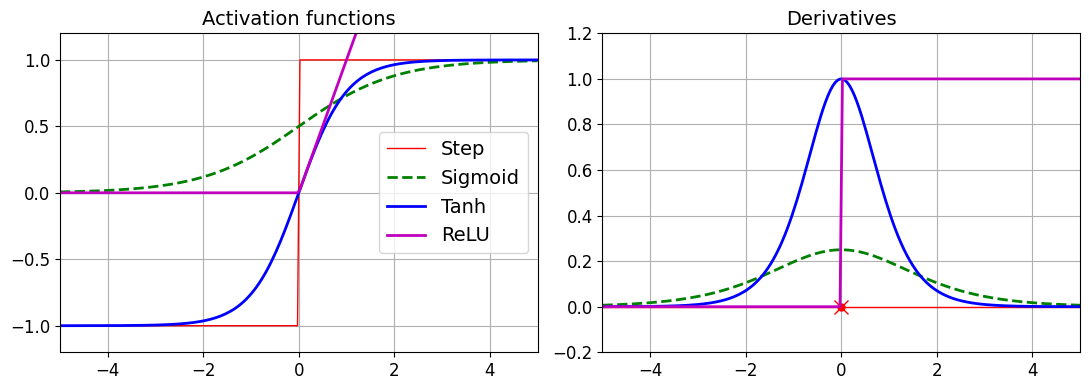

In [12]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label = "Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label = "Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label = "Tanh")
plt.plot(z, relu(z), "m-", linewidth=2, label = "ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-", linewidth=2, label="ReLU")
plt.grid(True)

plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [13]:
def heaviside(z):
    return(z>=0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1+x2-1.5) + activation(x1+x2-0.5)-0.5)

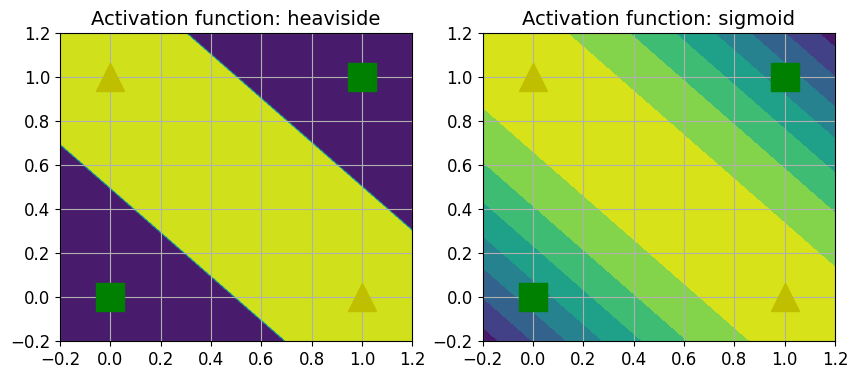

In [15]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

#### 10.1.5 회귀를 위한 다층 퍼셉트론

#### 10.1.6 분류를 위한 다층 퍼셉트론

### 10.2 케라스로 다층 퍼센트론 구현하기

#### 10.2.2. 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.10.1'

In [3]:
keras.__version__

'2.10.0'

In [4]:
# to load data, keras.datasets, the data is already split into train and test. test dataset to be split for valid

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape # 훈련세트 60000 개의 흑백 이미지, 크기는 28*28 픽셀

(60000, 28, 28)

In [6]:
X_train_full.dtype # 픽셀의 강도, 0~255 바이트로 표현됨

dtype('uint8')

In [7]:
# 전체 훈련세트를 검증 세트와 더 작은 훈련 세트로 나누기
# 픽셀 강도를 255로 나누어 0~1 범위의 실수로 바꾸기

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

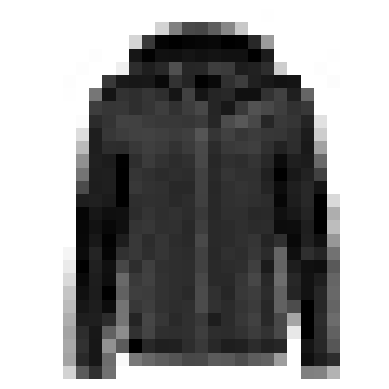

In [10]:
plt.imshow(X_train[0], cmap="binary") # cmap = colormap
plt.axis('off')
plt.show()


In [11]:
# 레이블은 0에서 9까지 (unit8로 표현된) 클래스 아이디
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names=["T-shirt/top", "Trouser", "Pulllover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
# 검증 세트는 5000개의 이미지
# 테스트 세트는 10000개의 이미지

X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

그림 저장:  fashion_mnist_plot


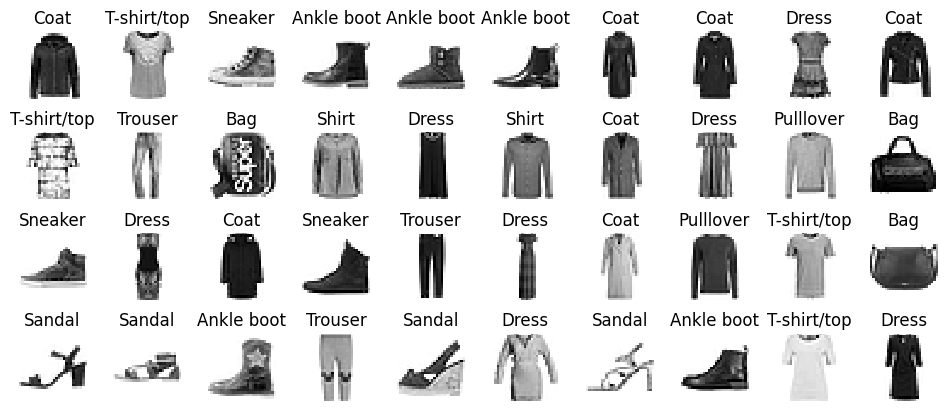

In [16]:
# To extract some samples

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row+col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
%pip install pydot
%pip install pydotplus
%pip install graphviz

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24591 sha256=c717f89ed8b492761626a7c993e965c5c41aafe80bb4a79190505236ef4a894a
  Stored in directory: c:\users\jaeho\appdata\local\pip\cache\wheels\fa\2a\3c\e479c08ec101d2ae98ed32b6ecfa71d6256b02aa5791298873
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


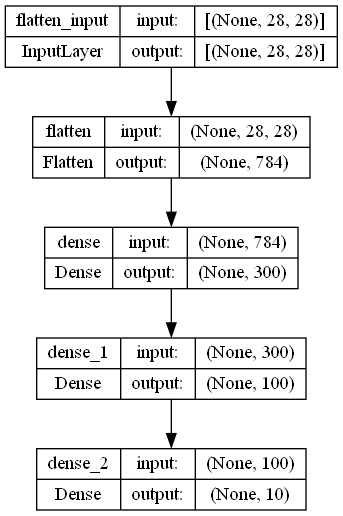

In [22]:
# You must install pydot (`pip install pydot`) and install graphviz -> After Install, Restart
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [24]:
model.get_layer(hidden1.name) is hidden1

True

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[-0.01205599, -0.0150688 , -0.03031639, ...,  0.00701217,
        -0.00569348, -0.06822945],
       [ 0.04220662, -0.03769996, -0.06958058, ...,  0.07372241,
         0.04565345,  0.06873403],
       [-0.02860155, -0.04675554,  0.01443484, ..., -0.04375592,
        -0.02718864, -0.0352021 ],
       ...,
       [ 0.03571423, -0.06195432,  0.02021509, ..., -0.02937059,
         0.07298605,  0.01043695],
       [-0.07257645, -0.00669471,  0.03495666, ..., -0.02059257,
        -0.01349054,  0.06117128],
       [-0.02286872, -0.01635742, -0.03326745, ..., -0.03945018,
        -0.02904769, -0.01483002]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              # optimizer=keras.optimizers.SGD(),
              # metrics=[keras.metrics.sparse_categorical_accuracy])

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7215 - accuracy: 0.7638 - val_loss: 0.5302 - val_accuracy: 0.8158
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4903 - accuracy: 0.8274 - val_loss: 0.4371 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8438 - val_loss: 0.5743 - val_accuracy: 0.7886
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8549 - val_loss: 0.3926 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3975 - accuracy: 0.8614 - val_loss: 0.3772 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3791 - accuracy: 0.8665 - val_loss: 0.3702 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3674 - accuracy: 0.8707 - val_loss: 0.3635 - val_accuracy:

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

그림 저장:  keras_learning_curves_plot


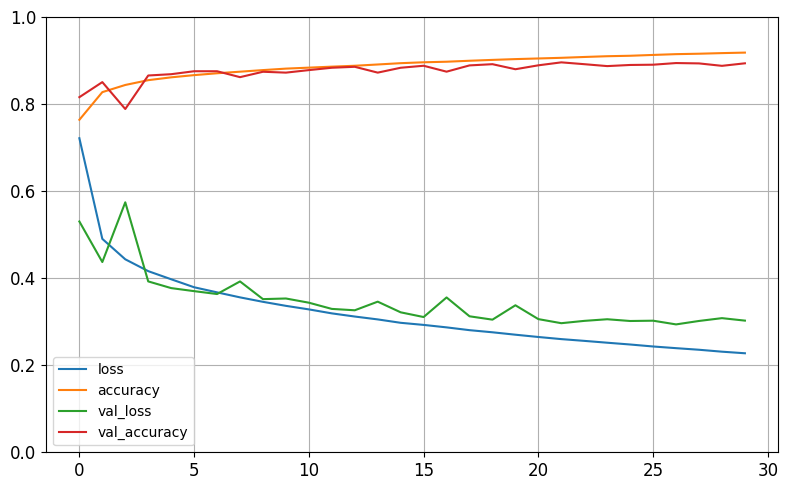

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8794


[0.3424588739871979, 0.8794000148773193]

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 63ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 18ms/step


array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pulllover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

그림 저장:  fashion_mnist_images_plot


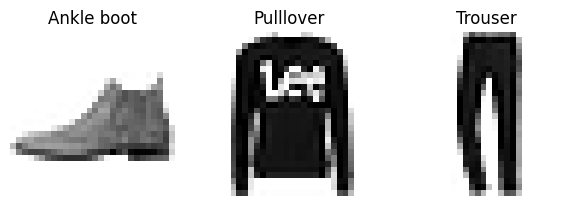

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation = "nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize = 12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

#### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [44]:
# Regression MLP

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2080 - val_loss: 2.1752
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8189 - val_loss: 0.8592
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6759 - val_loss: 0.6306
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6172 - val_loss: 0.5782
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5781 - val_loss: 0.5487
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5479 - val_loss: 0.5271
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5258 - val_loss: 0.5094
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5089 - val_loss: 0.4874
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4956 - val_loss: 0.4730
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4847 - val_loss: 0.4584

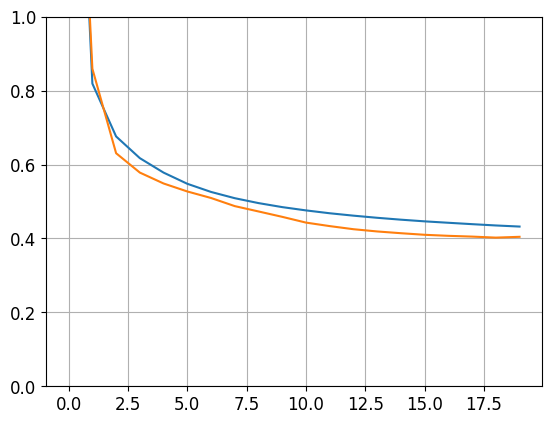

In [49]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#  plt.gca() :  to get the current Axes instance on the current figure matching the given keyword args, or create one

#### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [51]:
# 모든 신경망 모델이 순서대로 나열되지는 않음
# 어던 신경망은 매우 복잡한 구조를 가짐
# 여러 개의 입력 또는 여러 개의 출력

np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30, activation="relu")(input_)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_7[0][0]']            

In [57]:
model.compile(loss="mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate=1e-3))
history=model.fit(X_train, y_train, epochs=20,
                 validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.9287 - val_loss: 0.8836
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6409 - val_loss: 0.6894
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5906 - val_loss: 0.5400
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5555 - val_loss: 0.5227
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5277 - val_loss: 0.5046
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5038 - val_loss: 0.4787
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4869 - val_loss: 0.4500
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4733 - val_loss: 0.4529
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4621 - val_loss: 0.4527
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4532 - val_loss: 0.4428

In [58]:
# Wide or Deep 
# (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달
# 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달

np.random.seed(42)
tf.random.set_seed(42)

In [59]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [60]:

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5337 - val_loss: 1.7337
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8965 - val_loss: 0.8635
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7205 - val_loss: 0.6874
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6615 - val_loss: 0.6381
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6257 - val_loss: 0.5937
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5966 - val_loss: 0.5677
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5717 - val_loss: 0.5386
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5486 - val_loss: 0.5157
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5267 - val_loss: 0.4940
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5061 - val_loss: 0.4735

In [61]:
# 규제를 위한 보조 출력 추가하기:

np.random.seed(42)
tf.random.set_seed(42)

In [62]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [63]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [64]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.7872 - main_output_loss: 2.5528 - aux_output_loss: 4.8963 - val_loss: 1.5141 - val_main_output_loss: 1.2581 - val_aux_output_loss: 3.8178
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0764 - main_output_loss: 0.8536 - aux_output_loss: 3.0814 - val_loss: 1.1190 - val_main_output_loss: 0.7932 - val_aux_output_loss: 4.0508
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8213 - main_output_loss: 0.6727 - aux_output_loss: 2.1579 - val_loss: 1.1103 - val_main_output_loss: 0.6931 - val_aux_output_loss: 4.8652
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7265 - main_output_loss: 0.6102 - aux_output_loss: 1.7727 - val_loss: 1.0306 - val_main_output_loss: 0.5746 - val_aux_output_loss: 5.1347
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6745 - main_output_loss: 0.5723 - aux_output_loss: 1.5949 - val_loss

In [65]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 46ms/step


#### 10.2.5 서브클래싱 API로 동적 모델 만들기

In [66]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation="relu")
        

In [67]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer = keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs = 10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, my_pred_aux = model.predict((X_new_A, X_new_B))


Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 3.2955 - output_1_loss: 3.1306 - output_2_loss: 4.7789 - val_loss: 3.0546 - val_output_1_loss: 2.9793 - val_output_2_loss: 3.7325
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.2304 - output_1_loss: 1.0109 - output_2_loss: 3.2062 - val_loss: 1.3868 - val_output_1_loss: 1.1904 - val_output_2_loss: 3.1547
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.9475 - output_1_loss: 0.7856 - output_2_loss: 2.4037 - val_loss: 0.9858 - val_output_1_loss: 0.7754 - val_output_2_loss: 2.8794
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8268 - output_1_loss: 0.6987 - output_2_loss: 1.9796 - val_loss: 0.8692 - val_output_1_loss: 0.6753 - val_output_2_loss: 2.6135
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7562 - output_1_loss: 0.6475 - output_2_loss: 1.7346 - val_loss: 0.7827 - val_output_1_loss: 0.6059 - val_ou

In [68]:
# 저장과 복원

np.random.seed(42)
tf.random.set_seed(42)


In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [77]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.5313 - val_loss: 0.9900
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6874 - val_loss: 0.6393
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6070 - val_loss: 0.5738
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5672 - val_loss: 0.5424
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5373 - val_loss: 0.5124
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5118 - val_loss: 0.4888
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4918 - val_loss: 0.4709
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4751 - val_loss: 0.4520
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4614 - val_loss: 0.4378
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4337


In [78]:
model.save("my_keras_model.h5")

In [79]:
model = keras.models.load_model("my_keras_model.h5")

In [80]:
model.predict(X_new)

1/1 [==============================] - 0s 43ms/step


array([[0.6129582],
       [1.3328128],
       [3.2410445]], dtype=float32)

In [81]:
model.save_weights("my_keras_weights.ckpt")

In [84]:
model.load_weights("my_keras_weights.ckpt")

In [85]:
# 훈련과정에서 콜백 사용하기

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [87]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # Best Model Rollback
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.8802 - val_loss: 1.4237
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6495 - val_loss: 0.6360
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5917 - val_loss: 0.5534
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5546 - val_loss: 0.5253
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5271 - val_loss: 0.4945
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5028 - val_loss: 0.4723
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4847 - val_loss: 0.4542
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4696 - val_loss: 0.4410
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4574 - val_loss: 0.4343
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4460


In [88]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4399 - val_loss: 0.4305
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4335 - val_loss: 0.4436
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4283 - val_loss: 0.4409
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4234 - val_loss: 0.4510
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4197 - val_loss: 0.4377
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4159 - val_loss: 0.4465
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4131 - val_loss: 0.4478
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4104 - val_loss: 0.4315
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4077 - val_loss: 0.4348
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4052 - val_lo

In [89]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [90]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

341/363 [===========================>..] - ETA: 0s - loss: 0.3474
val/train: 1.03
363/363 [==============================] - 1s 3ms/step - loss: 0.3507 - val_loss: 0.3602


In [91]:
# 텐서보드

root_logdir = os.path.join(os.curdir, "my_logs")

In [92]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_02_22-16_44_53'

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [95]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.0178 - val_loss: 0.9386
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8130 - val_loss: 0.7084
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7019 - val_loss: 0.6553
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6562 - val_loss: 0.6193
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6214 - val_loss: 0.5790
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5602
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5632 - val_loss: 0.5239
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5390 - val_loss: 0.5046
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5172 - val_loss: 0.4914
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4983 - val_loss: 0.4688

텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:

$ tensorboard --logdir=./my_logs --port=6006
그다음 웹 브라우저를 열고 localhost:6006에 접속하면 텐서보드를 사용할 수 있습니다. 사용이 끝나면 터미널에서 Ctrl-C를 눌러 텐서보드 서버를 종료하세요.

또는 다음처럼 텐서보드의 주피터 확장을 사용할 수 있습니다(이 명령은 텐서보드가 로컬 컴퓨터에 설치되어 있어야 합니다):

In [96]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [97]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2023_02_22-16_46_11'

In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [100]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5939 - val_loss: 266.4723
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5519 - val_loss: 9.7205
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4923 - val_loss: 3.1490
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5179 - val_loss: 188.6163
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3906 - val_loss: 0.3247
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3570 - val_loss: 0.3688
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3381 - val_loss: 0.3201
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3279 - val_loss: 0.3020
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3207 - val_loss: 0.3462
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3159 - val_loss: 0.

In [101]:
# 텐서보드에 실행 결과가 2개, 학습 곡선을 비교
# 사용할 수 있는 로깅 옵션을 확인

help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



### 10.3 신경망 하이퍼파라미터 튜닝하기

In [123]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [125]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Python\Venv\Py37_ML\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [126]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.3761 - val_loss: 4.8605
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6606 - val_loss: 1.6811
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5521 - val_loss: 0.5132
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5003 - val_loss: 0.5521
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4748 - val_loss: 0.4288
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4553 - val_loss: 0.5031
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4447 - val_loss: 0.4117
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4349 - val_loss: 0.3973
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4260 - val_loss: 0.4289
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4202 - val_lo

In [127]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3552


In [128]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 43ms/step


In [129]:
np.random.seed(42)
tf.random.set_seed(42)

In [130]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8318 - val_loss: 0.4506
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4642 - val_loss: 0.4117
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4420 - val_loss: 0.3955
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4236 - val_loss: 0.3866
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4178 - val_loss: 0.3910
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4106 - val_loss: 0.3898
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4086 - val_loss: 0.3854
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4077 - val_loss: 0.3952
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4076 - val_loss: 0.3903
Epoch 10/100
242/242 [========

242/242 [==============================] - 1s 3ms/step - loss: 0.3441 - val_loss: 1.1709
Epoch 14/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3651
[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=  10.0s
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9536 - val_loss: 10.0439
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6293 - val_loss: 18.2805
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5921 - val_loss: 1.5207
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4436 - val_loss: 0.4268
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4066 - val_loss: 0.3765
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3926 - val_loss: 0.4145
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3845 - val_loss: 0.3598
Epoch 8/100
242/242 [========

242/242 [==============================] - 1s 3ms/step - loss: 0.4647 - val_loss: 0.4397
Epoch 45/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4628 - val_loss: 0.4371
Epoch 46/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4608 - val_loss: 0.4353
Epoch 47/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4590 - val_loss: 0.4352
Epoch 48/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4572 - val_loss: 0.4336
Epoch 49/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4555 - val_loss: 0.4323
Epoch 50/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4538 - val_loss: 0.4315
Epoch 51/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4522 - val_loss: 0.4294
Epoch 52/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4506 - val_loss: 0.4298
Epoch 53/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4490 - val_loss: 

Epoch 23/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5610 - val_loss: 0.6332
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5551 - val_loss: 0.5817
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5495 - val_loss: 0.5460
Epoch 26/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5442 - val_loss: 0.5270
Epoch 27/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5391 - val_loss: 0.5218
Epoch 28/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5343 - val_loss: 0.5280
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5296 - val_loss: 0.5396
Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5253 - val_loss: 0.5616
Epoch 31/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5211 - val_loss: 0.5943
Epoch 32/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5171

Epoch 65/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4367 - val_loss: 0.4501
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4356 - val_loss: 0.4531
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4345 - val_loss: 0.4476
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4334 - val_loss: 0.4502
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4324 - val_loss: 0.4509
Epoch 70/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4314 - val_loss: 0.4515
Epoch 71/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4304 - val_loss: 0.4481
Epoch 72/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4295 - val_loss: 0.4509
Epoch 73/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4286 - val_loss: 0.4476
Epoch 74/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4278

Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4380 - val_loss: 0.4758
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4283 - val_loss: 0.4116
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4190 - val_loss: 0.4917
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4125 - val_loss: 0.4129
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4063 - val_loss: 0.3944
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4010 - val_loss: 0.5023
Epoch 15/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3973 - val_loss: 0.3842
Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3924 - val_loss: 0.4860
Epoch 17/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3897 - val_loss: 0.3794
Epoch 18/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3860 

Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5041 - val_loss: 0.4429
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4423 - val_loss: 0.4234
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4119 - val_loss: 0.3937
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3949 - val_loss: 0.4310
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3841 - val_loss: 0.3823
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3754 - val_loss: 0.4446
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3701 - val_loss: 0.3925
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3654 - val_loss: 0.4212
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3619 - val_loss: 0.3611
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3571 - val_

242/242 [==============================] - 1s 3ms/step - loss: 0.3149 - val_loss: 0.3120
Epoch 42/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3126 - val_loss: 0.4947
Epoch 43/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3127 - val_loss: 0.4099
Epoch 44/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3121 - val_loss: 0.4357
Epoch 45/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3119 - val_loss: 0.3110
Epoch 46/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3095 - val_loss: 0.4157
Epoch 47/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3087 - val_loss: 0.3866
Epoch 48/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3096 - val_loss: 0.3415
Epoch 49/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3068 - val_loss: 0.3675
Epoch 50/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3070 - val_loss: 

242/242 [==============================] - 1s 2ms/step - loss: 0.4579 - val_loss: 1.5554
Epoch 11/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4460 - val_loss: 1.4887
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4360 - val_loss: 1.3761
Epoch 13/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4285 - val_loss: 1.2440
Epoch 14/100
121/121 [==============================] - 0s 1ms/step - loss: 0.4535
[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=   8.8s
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.8382 - val_loss: 5.2969
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7339 - val_loss: 2.0422
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6150 - val_loss: 0.7152
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5717 - val_loss: 0.5529
Epoch 5/100
242/242 [======

242/242 [==============================] - 1s 3ms/step - loss: 0.5347 - val_loss: 2.6705
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4559 - val_loss: 0.3964
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3993 - val_loss: 0.3672
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3782 - val_loss: 0.3704
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3661 - val_loss: 0.3876
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3584 - val_loss: 0.3834
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3520 - val_loss: 0.4033
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3473 - val_loss: 0.3988
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3440 - val_loss: 0.3905
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3411 - val_loss: 0.3844


242/242 [==============================] - 1s 3ms/step - loss: 0.3885 - val_loss: 0.3812
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3649 - val_loss: 0.3753
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3551 - val_loss: 0.3734
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3484 - val_loss: 0.4005
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3438 - val_loss: 0.3747
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3402 - val_loss: 0.3825
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3373 - val_loss: 0.3484
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3329 - val_loss: 0.3633
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3292 - val_loss: 0.3649
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3276 - val_loss: 0.36

242/242 [==============================] - 1s 3ms/step - loss: 0.3537 - val_loss: 0.4092
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3528 - val_loss: 0.3304
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3463 - val_loss: 0.3897
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3431 - val_loss: 0.3639
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3389 - val_loss: 0.3373
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3362 - val_loss: 0.3908
Epoch 15/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3332 - val_loss: 0.3355
Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3294 - val_loss: 0.3839
Epoch 17/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3269 - val_loss: 0.3357
Epoch 18/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3235 - val_loss: 

242/242 [==============================] - 1s 3ms/step - loss: 0.3873 - val_loss: 0.5846
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3796 - val_loss: 0.6722
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3743 - val_loss: 0.7815
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3714 - val_loss: 0.6322
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3666 - val_loss: 0.7819
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3625 - val_loss: 0.8404
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3606 - val_loss: 0.9102
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3582 - val_loss: 0.8699
Epoch 15/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3739
[CV] END learning_rate=0.004591455636549438, n_hidden=2, n_neurons=59; total time=  10.8s
Epoch 1/100
242/242 [=====

Epoch 71/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2962 - val_loss: 0.2907
Epoch 72/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2942 - val_loss: 0.2951
Epoch 73/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2947 - val_loss: 0.2935
Epoch 74/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2951 - val_loss: 0.2993
Epoch 75/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2925 - val_loss: 0.3222
Epoch 76/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2896 - val_loss: 0.3903
Epoch 77/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2948 - val_loss: 0.3083
Epoch 78/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2907 - val_loss: 0.3075
Epoch 79/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2895 - val_loss: 0.2922
Epoch 80/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2878

C:\Python\Venv\Py37_ML\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [            nan -3.51242721e-01 -4.48274960e-01 -3.74390711e-01
 -5.22958369e+05 -3.43509108e-01 -3.96995167e-01 -3.39802573e-01
 -3.26992571e-01 -3.36852123e-01]
  category=UserWarning,


363/363 [==============================] - 1s 3ms/step - loss: 0.8215 - val_loss: 1.1289
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4433 - val_loss: 0.6330
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3925 - val_loss: 0.3958
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3710 - val_loss: 0.3479
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3609 - val_loss: 0.3507
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3508 - val_loss: 0.4251
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3487 - val_loss: 0.3541
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3413 - val_loss: 0.4148
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3357 - val_loss: 0.3261
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3315 - val_loss: 0.4609
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000011B608E1608>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

In [131]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [132]:
rnd_search_cv.best_score_

-0.32699257135391235

In [133]:
rnd_search_cv.best_estimator_

In [134]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3001


-0.3001026511192322

In [135]:
model = rnd_search_cv.best_estimator_.model
model

In [136]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3001


0.3001026511192322

### 연습문제

#### 10. 문제: 심층 MLP를 MNIST 데이터셋에 훈련해보세요(keras.datasets.mnist.load_data() 함수를 사용해 데이터를 적재할 수 있습니다). 98% 이상의 정확도를 얻을 수 있는지 확인해보세요. 이 장에서 소개한 방법을 사용해 최적의 학습률을 찾아보세요(즉 학습률을 지수적으로 증가시키면서 손실을 그래프로 그립니다. 그다음 손실이 다시 증가하는 지점을 찾습니다). 모든 부가 기능을 추가해보세요. 즉, 체크포인트를 저장하고, 조기 종료를 사용하고, 텐서보드를 사용해 학습 곡선을 그려보세요.

In [137]:
# load data

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [138]:
# train data set

X_train_full.shape

(60000, 28, 28)

In [139]:
# pixel (0~255 byte)

X_train_full.dtype

dtype('uint8')

In [140]:
# train set split into train and valid 
# pixel scaled to 0-1

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

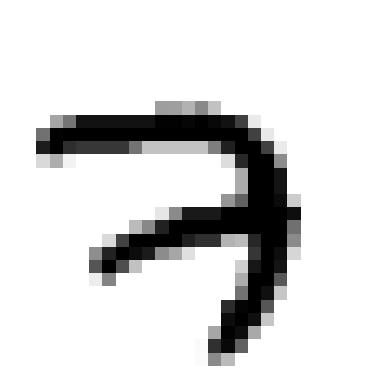

In [141]:
# print an image

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [142]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [143]:
X_valid.shape

(5000, 28, 28)

In [144]:
X_test.shape

(10000, 28, 28)

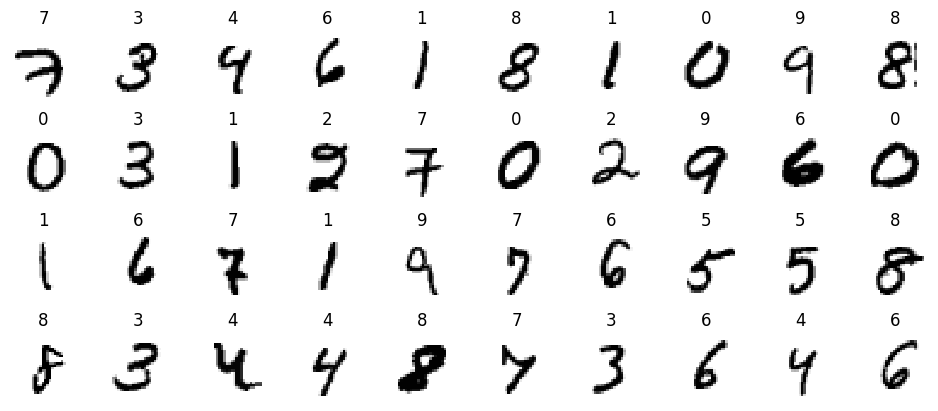

In [145]:
# print samples

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [146]:
# to find the opimal learning rate
# to repeatedly increase learning rate by using callback
# call back records lr and loss

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [147]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [148]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [149]:
# start from 1e-3, increase by 0.5%

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [150]:
# train 1 epoch

history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 6s 3ms/step - loss: 12710010.0000 - accuracy: 0.5760 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

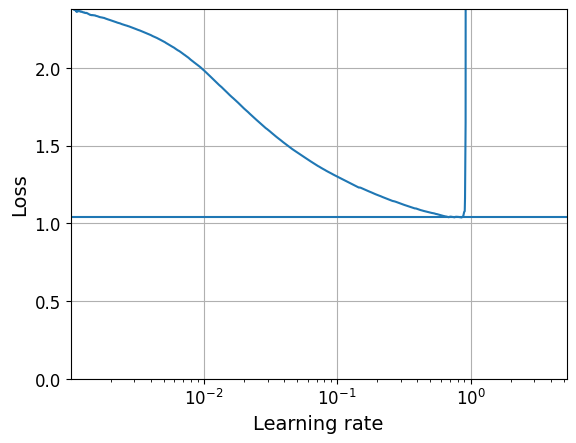

In [151]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [152]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [153]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [154]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [155]:
run_index = 1 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [156]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2326 - accuracy: 0.9275 - val_loss: 0.1080 - val_accuracy: 0.9668
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.0949 - val_accuracy: 0.9720
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9790 - val_loss: 0.0799 - val_accuracy: 0.9758
Epoch 4/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0785 - val_accuracy: 0.9804
Epoch 5/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.0952 - val_accuracy: 0.9748
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9806
Epoch 7/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0827 - val_ac

In [157]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9776


[0.08073951303958893, 0.9775999784469604]

In [158]:
%tensorboard --logdir=./my_mnist_logs --port=6007